In [44]:
import visual_behavior.database as db
from visual_behavior.translator.foraging2 import data_to_change_detection_core
from visual_behavior.translator.core import create_extended_dataframe

from visual_behavior import plotting as vbp

In [40]:
%matplotlib notebook
%widescreen

In [6]:
filepaths = {
    'before':'/allen/programs/braintv/production/visualbehavior/prod0/specimen_975925487/behavior_session_1010023700/200224143413_498758_86f5af16-fc61-4746-989d-583e6aea8ffe.pkl',
    'ext_1':'/allen/programs/braintv/production/visualbehavior/prod0/specimen_975925487/behavior_session_1010210324/200225142802_498758_b60ab1d0-19c2-4bf5-8d55-dd8304436688.pkl',
    'ext_2':'/allen/programs/braintv/production/visualbehavior/prod0/specimen_975925487/behavior_session_1010484840/200226142112_498758_bbc81061-f62c-429c-bc86-62699307dbf4.pkl',
    'ext_3':'/allen/programs/braintv/production/visualbehavior/prod0/specimen_975925487/behavior_session_1010773367/200227143206_498758_020d4f19-8b3a-4ef5-8224-b0a1d6a0110d.pkl',
}

In [12]:
data = {}
for name,filepath in filepaths.items():
    data[name] = data_to_change_detection_core(pd.read_pickle(filepath))
    data[name]['extended_trials'] = create_extended_dataframe(**data[name])

In [15]:
data['before']['extended_trials'].sample(5)

,index,lick_times,auto_rewarded,cumulative_volume,cumulative_reward_number,reward_volume,reward_times,reward_frames,rewarded,optogenetics,response_type,response_time,response_latency,change_frame,change_time,starttime,startframe,trial_length,scheduled_change_time,endtime,endframe,initial_image_category,initial_image_name,change_image_name,change_image_category,change_ori,change_contrast,initial_ori,initial_contrast,delta_ori,mouse_id,response_window,task,stage,session_duration,user_id,LDT_mode,blank_screen_timeout,stim_duration,blank_duration_range,prechange_minimum,stimulus_distribution,stimulus,distribution_mean,computer_name,behavior_session_uuid,startdatetime,date,year,month,day,hour,dayofweek,number_of_rewards,rig_id,trial_type,lick_frames,reward_licks,reward_lick_count,reward_lick_latency,reward_rate,response,color
414,414,"[1914.748655399948, 1914.8654427999281, 1915.1...",False,0.291,43,0.007,[1914.748655399948],[114778],True,False,HIT,[],0.583852,114743.0,1914.164803,1911.145553,114562,7.523090,4.0,1918.668715,115013,im065,im065,im069,im069,None,None,None,None,None,498758,"[0.15, 0.75]",DoC,TRAINING_5_images_A_epilogue,4505.219169,conor.grasso,single,False,6000.0,"[0.5, 0.5]",0.0,geometric,images,0.3,WXVS-SYSLOGIC7,86f5af16-fc61-4746-989d-583e6aea8ffe,2020-02-24 14:34:20.075000-08:00,2020-02-24,2020,2,24,14,0,1,B1,go,"[114778, 114785, 114801, 114809, 114816, 11482...","[0.11678739998023957, 0.3836254000198096, 0.51...",7,0.116787,0.0,1.0,#55a868
772,772,"[3465.9281035999884, 3466.061521399941, 3466.3...",False,0.522,76,0.007,[3465.9281035999884],[207759],True,False,HIT,[],0.684013,207718.0,3465.244091,3461.490937,207493,8.256984,5.0,3469.748060,207988,im077,im077,im066,im066,None,None,None,None,None,498758,"[0.15, 0.75]",DoC,TRAINING_5_images_A_epilogue,4505.219169,conor.grasso,single,False,6000.0,"[0.5, 0.5]",0.0,geometric,images,0.3,WXVS-SYSLOGIC7,86f5af16-fc61-4746-989d-583e6aea8ffe,2020-02-24 14:34:20.075000-08:00,2020-02-24,2020,2,24,14,0,1,B1,go,"[207759, 207767, 207782, 207789, 207797, 20780...","[0.13341779995243996, 0.38362959993537515, 0.5...",11,0.133418,0.0,1.0,#55a868
786,786,"[3537.10577189998, 3537.255851700029]",False,0.543,79,0.000,[],[],True,False,EARLY_RESPONSE,[],NaN,NaN,NaN,3535.120720,211907,3.002541,8.0,3538.123230,212087,im069,im069,im069,im069,None,None,None,None,None,498758,"[0.15, 0.75]",DoC,TRAINING_5_images_A_epilogue,4505.219169,conor.grasso,single,False,6000.0,"[0.5, 0.5]",0.0,geometric,images,0.3,WXVS-SYSLOGIC7,86f5af16-fc61-4746-989d-583e6aea8ffe,2020-02-24 14:34:20.075000-08:00,2020-02-24,2020,2,24,14,0,0,B1,aborted,"[212026, 212035]",[],0,NaN,0.0,0.0,lightgray
481,481,[2185.6808753000223],False,0.333,49,0.000,[],[],True,False,EARLY_RESPONSE,[],NaN,NaN,NaN,2184.446441,130946,2.251943,8.0,2186.698443,131081,im085,im085,im085,im085,None,None,None,None,None,498758,"[0.15, 0.75]",DoC,TRAINING_5_images_A_epilogue,4505.219169,conor.grasso,single,False,6000.0,"[0.5, 0.5]",0.0,geometric,images,0.3,WXVS-SYSLOGIC7,86f5af16-fc61-4746-989d-583e6aea8ffe,2020-02-24 14:34:20.075000-08:00,2020-02-24,2020,2,24,14,0,0,B1,aborted,[131020],[],0,NaN,0.0,0.0,lightgray
776,776,[3487.4298405999434],False,0.522,76,0.000,[],[],True,False,EARLY_RESPONSE,[],NaN,NaN,NaN,3481.775004,208709,6.005275,8.0,3487.780158,209069,im066,im066,im066,im066,None,None,None,None,None,498758,"[0.15, 0.75]",DoC,TRAINING_5_images_A_epilogue,4505.219169,conor.grasso,single,False,6000.0,"[0.5, 0.5]",0.0,geometric,images,0.3,WXVS-SYSLOGIC7,86f5af16-fc61-4746-989d-583e6aea8ffe,2020-02-24 14:34:20.075000-08:00,2020-02-24,2020,2,24,14,0,0,B1,aborted,[209048],[],0,NaN,0.0,0.0,lightgray


<IPython.core.display.Javascript object>


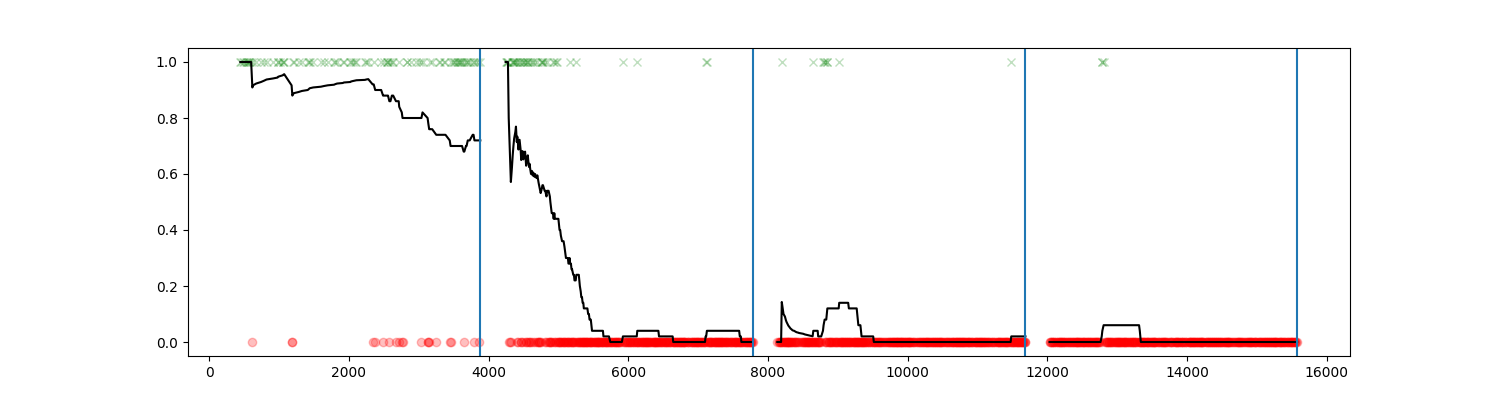

In [52]:
fig,ax=plt.subplots(figsize=(15,4))

time_offset = 0
for session_name in ['before','ext_1','ext_2','ext_3']:
    go_trials = data[session_name]['extended_trials'].query('trial_type == "go"').copy().reset_index()
    go_trials['response_rate'] = go_trials['response'].rolling(window=50,min_periods=0).mean()
    
    hits = go_trials.query('response==1')
    ax.plot(hits['change_time']+time_offset, hits['response'],linestyle='none',marker='x',color='green',alpha=0.25)
    
    misses = go_trials.query('response==0')
    ax.plot(misses['change_time']+time_offset, misses['response'],linestyle='none',marker='o',color='red',alpha=0.25)
    
    ax.plot(go_trials['change_time']+time_offset, go_trials['response_rate'],linestyle='-',color='black')
    
    time_offset += go_trials.change_time.max()
    ax.axvline(time_offset)
    
savepath= '/home/dougo/dropbox/BrainTV-BehaviorDevelopment/Phase 4 Planning/'
fname = 'extinction_performance_for_pete'

vbp.save_figure(fig,os.path.join(savepath,fname),formats=['.png','.pdf'],size=(15,4))

<IPython.core.display.Javascript object>


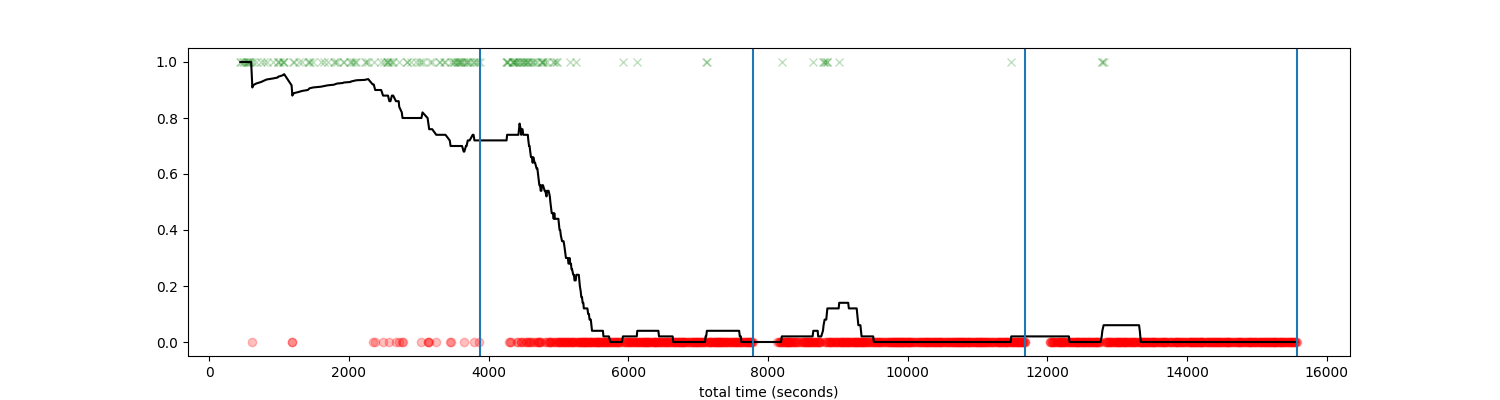

Text(0.5, 0, 'total time (seconds)')

In [62]:
fig,ax=plt.subplots(figsize=(15,4))

time_offset = 0
all_go_trials = []
session_change_times = []
for session_name in ['before','ext_1','ext_2','ext_3']:
    go_trials = data[session_name]['extended_trials'].query('trial_type == "go"').copy().reset_index()
    
    go_trials['adjusted_time'] = go_trials['change_time'] + time_offset
    
    all_go_trials.append(go_trials)
    
    time_offset += go_trials.change_time.max()
    session_change_times.append(time_offset)
    
all_go_trials =pd.concat(all_go_trials)
hits = all_go_trials.query('response==1')
ax.plot(hits['adjusted_time'], hits['response'],linestyle='none',marker='x',color='green',alpha=0.25)

misses = all_go_trials.query('response==0')
ax.plot(misses['adjusted_time'], misses['response'],linestyle='none',marker='o',color='red',alpha=0.25)

all_go_trials['response_rate'] = all_go_trials['response'].rolling(window=50,min_periods=0).mean()
ax.plot(all_go_trials['adjusted_time'], all_go_trials['response_rate'],linestyle='-',color='black')

for time_offset in session_change_times:
    ax.axvline(time_offset)
    
ax.set_xlabel('total time (seconds)')
    
# savepath= '/home/dougo/dropbox/BrainTV-BehaviorDevelopment/Phase 4 Planning/'
# fname = 'extinction_performance_for_pete'

# vbp.save_figure(fig,os.path.join(savepath,fname),formats=['.png','.pdf'],size=(15,4))

In [59]:
session_change_numbers

[109, 451, 800, 1142]

<IPython.core.display.Javascript object>


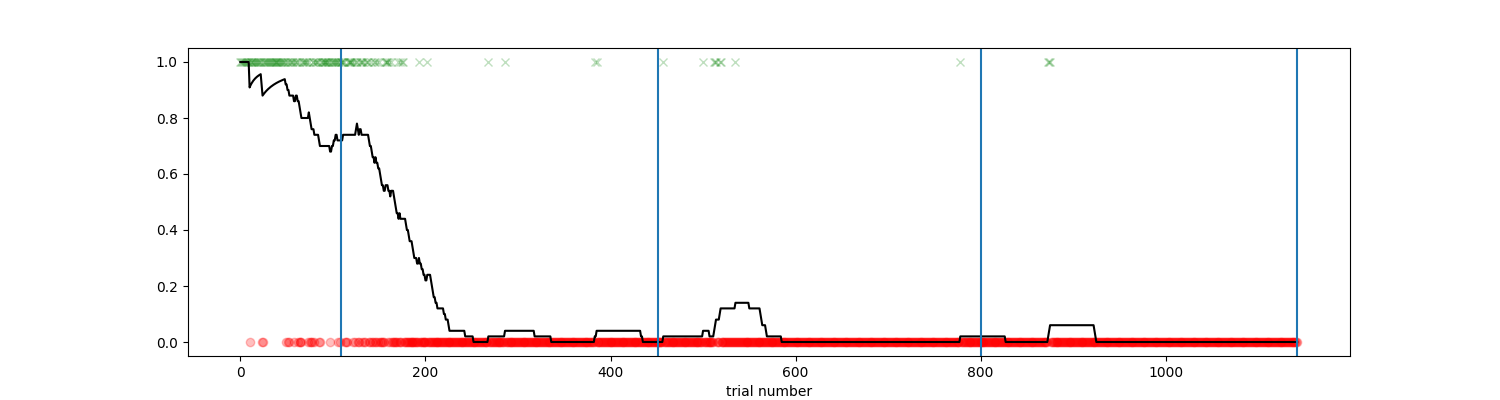

Text(0.5, 0, 'trial number')

In [61]:
fig,ax=plt.subplots(figsize=(15,4))

trial_offset = 0
all_go_trials = []
session_change_numbers = []
for session_name in ['before','ext_1','ext_2','ext_3']:
    go_trials = data[session_name]['extended_trials'].query('trial_type == "go"').copy().reset_index()
    
    go_trials['adjusted_trial_number'] = go_trials.index + trial_offset
    
    all_go_trials.append(go_trials)
    
    trial_offset += go_trials.index.max()
    session_change_numbers.append(trial_offset)
    
all_go_trials =pd.concat(all_go_trials)
hits = all_go_trials.query('response==1')
ax.plot(hits['adjusted_trial_number'], hits['response'],linestyle='none',marker='x',color='green',alpha=0.25)

misses = all_go_trials.query('response==0')
ax.plot(misses['adjusted_trial_number'], misses['response'],linestyle='none',marker='o',color='red',alpha=0.25)

all_go_trials['response_rate'] = all_go_trials['response'].rolling(window=50,min_periods=0).mean()
ax.plot(all_go_trials['adjusted_trial_number'], all_go_trials['response_rate'],linestyle='-',color='black')

for trial_offset in session_change_numbers:
    ax.axvline(trial_offset)
    
ax.set_xlabel('trial number')

In [68]:
np.log10(0.99)

-0.004364805402450088